# Matplotlib ja kuvaajien luominen

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib notebook # tämä 'taikakomento' tarvitaan kuvaajien näyttämiseksi notebookissa

## Luodaan data, josta kuvaajat tullaan tekemään

In [6]:
x = np.linspace(0,np.pi*10, 100)
y = np.sin(x)
# Voit katsoa dataa poistamalla alla olevalta riviltä kommentin
# print(x,y)

Text(0.5, 1.0, 'Kuvaajan otsikko')

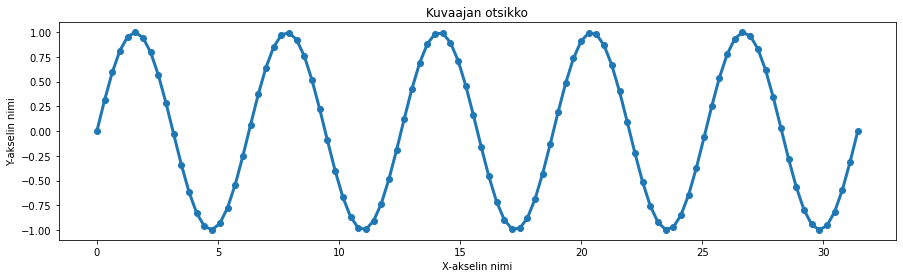

In [10]:
fig, ax = plt.subplots(figsize=(15,4))

ax.plot(x, y, **{'marker': 'o', 'linewidth': 3})
ax.set_xlabel('X-akselin nimi')
ax.set_ylabel('Y-akselin nimi')
ax.set_title('Kuvaajan otsikko')

## Sama kuvaaja 'proseduaalisesti' käyttäen pyplotin valmiita plottausfunktiota. En suosittele tätä tapaa.

Text(0.5, 1.0, 'Kuvaajan otsikko')

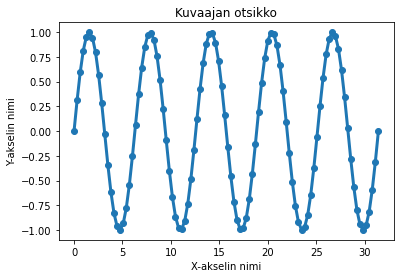

In [11]:
plt.plot(x,y, **{'marker': 'o', 'linewidth': 3})
plt.xlabel('X-akselin nimi')
plt.ylabel('Y-akselin nimi')
plt.title('Kuvaajan otsikko')

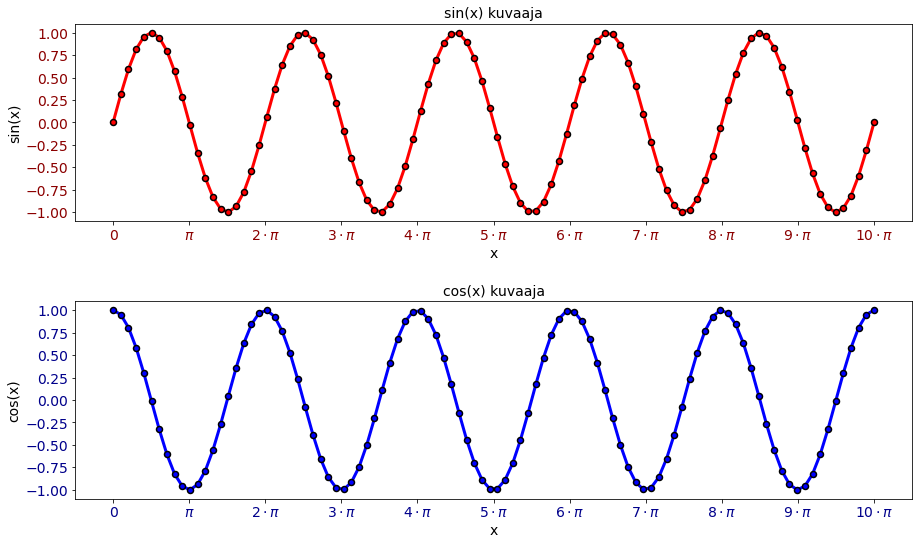

In [13]:
# Kahden kuvaajan kuva
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(15,8))

# Kuvaaja 1: punainen sinikäyrä
axs[0].plot(x, y, **{'marker': 'o',
    'linewidth': 3,
    'color': 'r',
    'markeredgecolor': 'k',
    'markeredgewidth': 1.5})
axs[0].set_xlabel('x', fontsize=14)
axs[0].set_ylabel('sin(x)', fontsize=14)
axs[0].set_title('sin(x) kuvaaja', fontsize=14)

# Asetetaan x- ja y-akselien merkkien paikat
axs[0].set_xticks(np.linspace(0, 10*np.pi, 10+1))
axs[0].set_yticks(np.linspace(-1,1,9))

# Tehdään oma esitysfunktio, joka palauttaa mikä piin monikerta merkin paikalla on
def piformat(value, pos):
    ''''Palauttaa arvon 'pos' mukaisen piin monikerran merkkijonona'''
    if np.abs(value-0) < 0.001:
        return '0'
    if np.abs(value - np.pi) < 0.001:
        return r'$\pi$'
    else:
        return r'${:d}\cdot \pi$'.format(pos)

formatter = FuncFormatter(piformat)

axs[0].xaxis.set_major_formatter(formatter)

# Suurennetaan akselin merkkien kokoa ja asetetaan uusi väri
axs[0].tick_params(**{'labelsize': 14, 'labelcolor': 'darkred'})

# Interaktiiviseen kuvaajaan tämä on pakollinen
# koska olemme asettaneet FuncFormatter-olion x-akselille.
# Jos format_coord ei aseteta, hiiren liike kuvan päällä aiheuttaa
# virheen.

axs[0].format_coord = lambda x, y:  "x={:g}, y={:g}".format(x, y)

# Toinen kuvaaja: sininen kosinikäyrä
y2 = np.cos(x)
axs[1].plot(x, y2, **{'marker': 'o',
    'linewidth': 3,
    'color': 'b',
    'markeredgecolor':
    'k',
    'markeredgewidth': 1.5})
axs[1].set_xlabel('x', fontsize=14)
axs[1].set_ylabel('cos(x)', fontsize=14)
axs[1].set_title('cos(x) kuvaaja', fontsize=14)

axs[1].set_xticks(np.linspace(0, 10*np.pi, 10+1))
axs[1].set_yticks(np.linspace(-1,1,9))

formatter = FuncFormatter(piformat)

axs[1].xaxis.set_major_formatter(formatter)

axs[1].tick_params(**{'labelsize': 14, 'labelcolor': 'darkblue'})

axs[1].format_coord = lambda x, y:  "x={:g}, y={:g}".format(x, y)

# Muutetaan ylemmän kuvaajan paikkaa, jotta kaikki teksti mahtuu
axes_pos = axs[0].get_position()
axes_pos.y0 = axes_pos.y0 + 0.07
axes_pos.y1 = axes_pos.y1 + 0.07
axs[0].set_position(axes_pos)